# Solving MECP with QAOA+ using "Parameter Fixing" technique

In [1]:
from utils_to_build_QAOAAnsatz import *

In [2]:
from functools import reduce
import os
import random
import time
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from scipy.optimize import minimize

## Set parameters

In [ ]:
params = get_parameters_from_user() 

# Get the parameters separately
chosen_instances = params['chosen_instances']
chosen_k = params['chosen_k']
max_p = params['p']
random_attempts = params['random_attempts']
init_string = params['init_string']
n = params['n']

In [12]:
# Define k.
def round_up(n, decimals=0):
    multiplier = 10**decimals
    return math.ceil(n * multiplier) / multiplier  

k_dict = {'L=n': [0.3333333333333333,   0.5,   0.5,   0.3333333333333333,   0.5,   0.5,   0.5,   
                  0.3333333333333333,   0.25,   0.25],
          'L=max(L_EC)': [0.16666666666666666,   0.16666666666666666,   0.25,   0.16666666666666666,  
                          0.3333333333333333, 0.25,   0.25,   0.16666666666666666,   0.08333333333333333,  
                          0.08333333333333333],
          'L=L_MEC': [0.16666666666666666,   0.16666666666666666,   0.16666666666666666,
                      0.1111111111111111,   0.16666666666666666,   0.16666666666666666,   0.25,   
                      0.16666666666666666,  0.08333333333333333,   0.08333333333333333]}

# Arrotondo per eccesso
k_dict_new = {}
for key,value_list in k_dict.items():
    k_dict_new[key] = [round_up(v, 3) for v in value_list]
k_dict_new

{'L=n': [0.334, 0.5, 0.5, 0.334, 0.5, 0.5, 0.5, 0.334, 0.25, 0.25],
 'L=max(L_EC)': [0.167,
  0.167,
  0.25,
  0.167,
  0.334,
  0.25,
  0.25,
  0.167,
  0.084,
  0.084],
 'L=L_MEC': [0.167,
  0.167,
  0.167,
  0.112,
  0.167,
  0.167,
  0.25,
  0.167,
  0.084,
  0.084]}

## Do the minimization

**************************************************
Instance 1 with h = 0.167



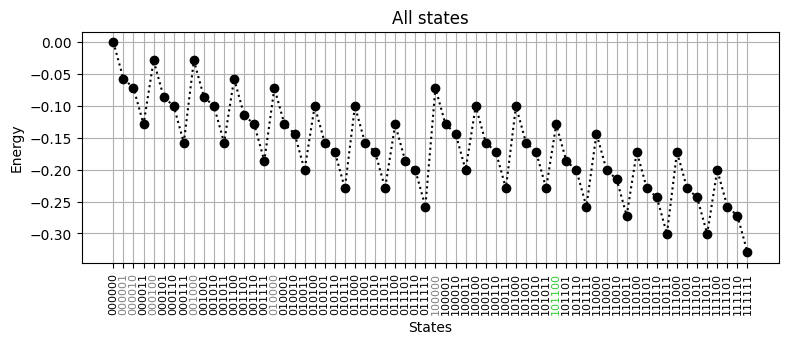

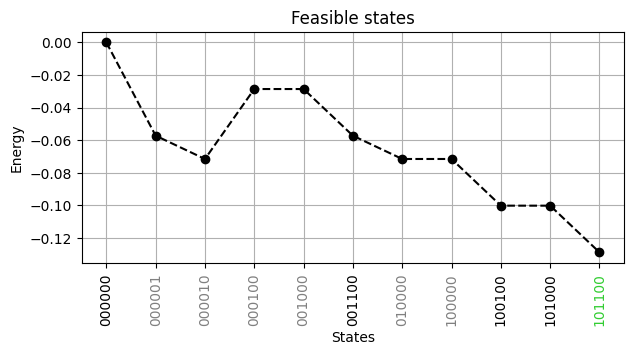


****************** p = 1 ******************
---------- 1/2 random attempts ----------
pars_0 = [4.270120195089065, -95.59698416155477]
bnds = [(0, 6.283185307179586), (-110, 110)]
Optimization terminated successfully.
         Current function value: 0.094263
         Iterations: 26
         Function evaluations: 47
E_min = result.fun + constant = -0.07043696854450762
E_min = result.fun = 0.09426303145549239

Optimal parameters: betas, gammas = [4.735056722357435], [-110.0]
--> ***UPDATING THE BEST ATTEMPT***

---------- 2/2 random attempts ----------
pars_0 = [2.8101416079665573, 65.1337152108818]
bnds = [(0, 6.283185307179586), (-110, 110)]
Optimization terminated successfully.
         Current function value: 0.087755
         Iterations: 57
         Function evaluations: 106
E_min = result.fun + constant = -0.07694531305710745
E_min = result.fun = 0.08775468694289257

Optimal parameters: betas, gammas = [4.556851237824969], [1.9087506859344554e-05]
--> ***UPDATING THE BEST ATTEMPT

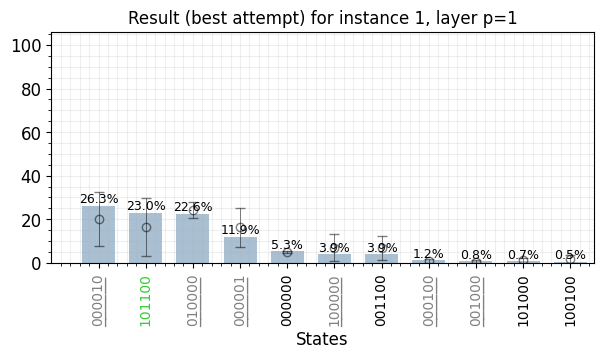


E_best's parameters: betas = [4.556851237824969], gammas = [1.9087506859344554e-05]

Execution time of p=1 layer: 0.1 min

****************** p = 2 ******************
---------- 1/2 random attempts ----------
pars_0 = [4.556851237824969, 0.2141697536365068, 1.9087506859344554e-05, -91.40096397001733]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (-110, 110), (-110, 110)]
Optimization terminated successfully.
         Current function value: 0.086231
         Iterations: 88
         Function evaluations: 164
E_min = result.fun + constant = -0.07846916446924534
E_min = result.fun = 0.08623083553075467

Optimal parameters: betas, gammas = [4.6256511269589655, 0.24921137035530916], [1.778489887022793e-05, -94.74085910284134]
--> ***UPDATING THE BEST ATTEMPT***

---------- 2/2 random attempts ----------
pars_0 = [4.556851237824969, 3.551091318884088, 1.9087506859344554e-05, -16.172472932373438]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (-110, 110), (-110, 110)]
Opti

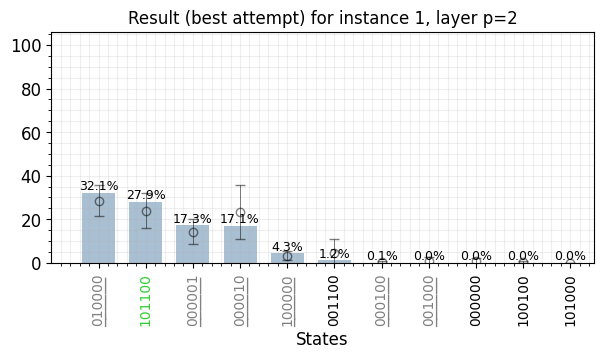


E_best's parameters: betas = [5.418427207221782, 5.077555801047961], gammas = [1.431087006582638e-05, 3.543091698114612e-05]

Execution time of p=2 layer: 0.6 min

****************** p = 3 ******************
---------- 1/2 random attempts ----------
pars_0 = [5.418427207221782, 5.077555801047961, 2.7274495960824092, 1.431087006582638e-05, 3.543091698114612e-05, -63.00598463034827]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-110, 110), (-110, 110), (-110, 110)]
Optimization terminated successfully.
         Current function value: 0.072951
         Iterations: 520
         Function evaluations: 795
E_min = result.fun + constant = -0.09174888721371884
E_min = result.fun = 0.07295111278628118

Optimal parameters: betas, gammas = [5.612813243481273, 6.283185305539501, 4.632949196003133], [3.259302436093842e-06, 4.8265588872313826e-05, 0.00022334753994382092]
--> ***UPDATING THE BEST ATTEMPT***

---------- 2/2 random attempts ----------
pars_0 = [5.418

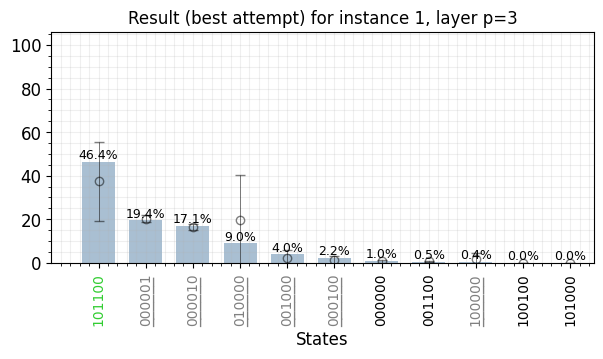


E_best's parameters: betas = [5.612813243481273, 6.283185305539501, 4.632949196003133], gammas = [3.259302436093842e-06, 4.8265588872313826e-05, 0.00022334753994382092]

Execution time of p=3 layer: 2.2 min
    states  counts_p1  counts_p2  counts_p3
0   100100          5        0.0        0.0
1   101000          7        0.0        0.0
2   100000         40       44.0        4.0
3   001100         40       12.0        5.0
4   000000         54        0.0       10.0
5   000100         12        1.0       23.0
6   001000          8        0.0       41.0
7   010000        231      329.0       92.0
8   000010        269      175.0      175.0
9   000001        122      177.0      199.0
10  101100        236      286.0      475.0

TOTAL ELAPSED TIME: 2.8713059186935426 minutes.


<Figure size 640x480 with 0 Axes>

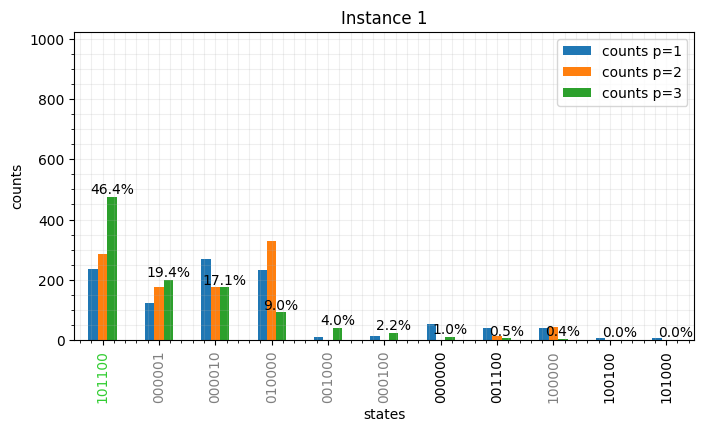

In [13]:
current_datetime = datetime.now().strftime("@%Y-%m-%d@%Hh%Mm%Ss")


# Create a  directory where to collect files
folder_path = f"{current_datetime}"
os.makedirs(folder_path, exist_ok=True)


# Run QAOA+ for every instance.
for instance in chosen_instances:
    h = k_dict_new[chosen_k][instance-1]
    print("*"*50)
    print(f"Instance {instance} with h = {h}\n")

    FILENAME_list = [] # list of .csv containing the final histograms data.
    DATA_FILENAME_list = [] # list of .txt containing metadata such as energies, betas, gammas.

    
    # Define the instance.
    U, subsets_dict = define_instance(n, instance, verbose=False)
    subsets = list(subsets_dict.values())
    _, _, _, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, h)
    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]
    
    
    # Plot states vs energy.
    show_spectrum(n, instance, h, fontsize=10)

    
    # Choose the initialization.
    if init_string == 'all1':
        # Only "1"-states.
        init_name = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')]

    elif init_string == 'all0':
        init_name = ["000000"]
        
      
    # Prepare the cost and mixing circuit.
    constant, hamiltonian, qc_cost = build_cost_circuit(n, instance, h, verbose=False)
    qc_mixing = build_mixing_circuit(n, instance, verbose=False)    
    qc_initial, check_counts  = build_initialization_circuit(n, instance, init_name, verbose=False)
    
    # # Check that initialization was correct.
    # plot_histogram(check_counts, ax=plt.subplots()[1], title="Initialization check", color='k')
    # plt.show(block=False) # don't stop execution
    
    
    # Set initial angles.
    gamma_bound = find_gamma_bound(n, instance, h, verbose=False)
    
    beta_0 = (0, 2*np.pi)
    gamma_0 =  (-gamma_bound, gamma_bound)
    string_0 = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"
    
    bnds_beta = (0, 2*np.pi)
    bnds_gamma = (-gamma_bound, gamma_bound)
    bnds_string = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"
    

    # Build files' names.
    header = f"{current_datetime}_dim{n}_mail{instance}_{init_string}" \
           + f"_p{max_p}_{random_attempts}ra_k{h}" \
           + f"_BOUNDS{bnds_string}_pars0{string_0}"

    DATA_FILENAME = os.path.join(folder_path, header + '_data.txt')
    DATA_FILENAME_list.append(DATA_FILENAME)
    
    
    # Collect information in one data-file.
    with open(DATA_FILENAME, 'a') as DATA_FILE:
        DATA_FILE.write(f"current datetime = {current_datetime}")
        DATA_FILE.write(f"The initial state is an equal superposition of: {init_name} \n")
        DATA_FILE.write(f"max_p = {max_p}\n")
        DATA_FILE.write(f"Random attempts for each layer: {random_attempts}\n")

        Energies = []
        list_df_best = []
        TOTAL_start_time = time.time()
    
        # Increase the number of layers step-by-step.
        for p in range(1, max_p+1):
        
            print(f"\n****************** p = {p} ******************")
            pth_start_time = time.time()
            E_best = 100
            Energies_of_layer_p = []
            
            for attempt in range(1,random_attempts+1):
                print(f"---------- {attempt}/{random_attempts} random attempts ----------")
                DATA_FILE.write(f"\n---------- {attempt}/{random_attempts} random attempts ----------\n")
    
                # Build QAOAAnsatz.
                cost_vs_iteration = [] # to save (and plot) iterations
                ansatz = QAOAAnsatz(qc_cost, 
                                    mixer_operator=qc_mixing, 
                                    initial_state=qc_initial, 
                                    reps=p, name='QAOA+')
        
                # Generate a pass manager without providing a backend.
                pm = generate_preset_pass_manager(optimization_level=3)
                ansatz_isa = pm.run(ansatz)
                hamiltonian_isa = hamiltonian.apply_layout(ansatz_isa.layout)
            
                estimator = StatevectorEstimator()
                sampler = StatevectorSampler()
            
                
                # *************************  FIND OPTIMAL ANGLES  ***************************
                # *************************     THROUGH QAOA+     ***************************
                
                # Set initial angles and angles'bounds.
                if p == 1:
                    pars_0 = [random.uniform(*beta_0)] + [random.uniform(*gamma_0)]  
                else:
                    pars_0 =  pth_betas + [random.uniform(*beta_0)] + pth_gammas + [random.uniform(*gamma_0)]  
                
                bnds = [bnds_beta]*p + [bnds_gamma]*p
                
                print(f"pars_0 = {pars_0}")
                print(f"bnds = {bnds}")
                
                
                # Do the minimization.
                result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations
                                  pars_0, bounds=bnds, 
                                  args=(ansatz_isa, hamiltonian_isa, estimator), 
                                  method="Nelder-Mead", 
                                  options={"disp": True, "maxiter": 1200, "maxfev": 1200}, tol=1e-4)
                
                
                # Works only if you chose cost_func_plot.
                if cost_vs_iteration != []:
                    plt.figure()
                    plt.plot(cost_vs_iteration) 
                    plt.xlabel("Iteration")
                    plt.ylabel("Cost")
                    plt.show()
                    
                    
                # Minimum energy reached with minimization.
                E_min = result.fun + constant
                print(f"E_min = result.fun + constant = {E_min}")
                print(f"E_min = result.fun = {result.fun}")
                DATA_FILE.write(f"\nE_min = {E_min}")
                Energies_of_layer_p.append(E_min)
            
            
                # Optimal parameters (betas, gammas) found.
                betas = list(result.x[:p])
                gammas = list(result.x[p:])
                print(f"\nOptimal parameters: betas, gammas = {betas}, {gammas}")
                DATA_FILE.write(f'\nE_min\'s parameters: betas = {betas}, gammas = {gammas}\n')
        
                
                # Update the best attempt.
                if E_min < E_best:
                    E_best = E_min
#                     d_best = d
                    betas_best = betas
                    gammas_best = gammas
                    best_attempt = attempt
                    print("--> ***UPDATING THE BEST ATTEMPT***\n")
                else:
                    print("--> ***NOT UPDATING THE BEST ATTEMPT***\n")
                    
                    
                # ****************************  RUN THE CIRCUIT  ******************************
                # ************************ WITH OPTIMAL PARAMETERS ****************************

                # Assign to the previously created ansatz the 2p parameters found.
                pars = betas + gammas 
                qc = ansatz.assign_parameters(pars)
                qc.measure_all() # add a measurement

                # Run this circuit.
                qc_isa = pm.run(qc)
                output = sampler.run([qc_isa], shots=1024).result()
                samp_dist = output[0].data.meas.get_counts()
           
                
                # ****************************  POST PROCESS  **********************************
                # *********************** AND SAVE THE OUTPUT HISTOGRAM ************************
            
                # Create a dataframe from the sampling results.
                df = pd.DataFrame(samp_dist.items(), columns=['states', 'counts'])

                # Remove ancillary bits.
                num_ancillas = get_circuit_parameters(subsets, verbose=False)[2]
                df['states'] = df['states'].apply(lambda x: x[num_ancillas:]) 

                # Invert the bit order for the states (e.g., convert "01101" to "10110").
                df['states'] = df['states'].apply(lambda s: str(s)[::-1])  # Invertiamo l'ordine dei bit

                # After removing the ancillary bits, we aggregate counts by state.
                df = df.groupby(['states']).sum().reset_index()

                # Sort in decreasing order.
                df = df.sort_values('counts', ascending=False) 

                # Rename the "counts" column to include attempt details.
                df.columns = ['states', f'counts_p{p}_{attempt}of{random_attempts}']

                # Merge the current attempt dataframe with previously built dataframes.
                if attempt == 1:
                    df_all_attempts = df
                else:
                    df_all_attempts = pd.merge(df_all_attempts, df, on="states", how="outer")    
               
            # *********************************************************************************
    
            Energies.append(Energies_of_layer_p)
            DATA_FILE.write(f"\n----- p = {p} layer -----\nMinimum energy found in each attempt: ")
            DATA_FILE.write(str(Energies_of_layer_p))
            
            print(f"E_best = {E_best}")
            DATA_FILE.write(f"\nE_best = {E_best}")
            
            
            # Plot the best attempt (minimum energy), with error bars
            # representing other attempts in the global dataframe.
            plot_histogram_of_best_column(df_all_attempts, 
                                          f'counts_p{p}_{best_attempt}of{random_attempts}', 
                                          EXACT_COVERS, init_name,
                                          fontsize=12, 
                                          title=f"Result (best attempt) for instance {instance}, layer p={p}")

            # Save to csv.
            df_best = df_all_attempts[['states', f'counts_p{p}_{best_attempt}of{random_attempts}']]
            df_best.columns = ['states', f'counts_p{p}'] # rename the second column
#             FILENAME = os.path.join(folder_path, header + f"_p{p}.csv")
            list_df_best.append(df_best)
#             df_best.to_csv(FILENAME, index=False)
        
            
            
            # Best parameters'vector of length 2p found for the p-th layer
            pth_betas = betas_best
            pth_gammas = gammas_best
            
            print(f'\nE_best\'s parameters: betas = {pth_betas}, gammas = {pth_gammas}\n')
            print("Execution time of p={0} layer: {1:.1f} min".format(p, (time.time() - pth_start_time)/60))
            DATA_FILE.write(f'\nE_best\'s parameters: betas = {pth_betas}, gammas = {pth_gammas}\n')
            DATA_FILE.write("Execution time of p={0} layer: {1:.1f} min\n".format(p, (time.time() - pth_start_time)/60))

#             # Merge dataframes.
#             if p == 1:
#                 df_final = df_best
#             else:
#                 df_final = pd.merge(df_final, df_best, on="states", how="outer")    
    


        # Merge dei DataFrame
        df_final = reduce(lambda left, right: pd.merge(left, right, on='states', how='outer'), list_df_best)
        df_final = df_final.fillna(0) # missing values -> 0
        df_final = df_final.sort_values(by=f'counts_p{max_p}').reset_index(drop=True)

        print(df_final)
        FILENAME = os.path.join(folder_path, header + f".csv")
        df_final.to_csv(FILENAME, index=False)
        
        # ************************ SEE FINAL RESULT ************************
        # Plot all the dataframes in one picture.
        plt.figure()
        plt.rcParams['font.size'] = 10
        df_final = df_final.fillna(0)
        df_final = df_final.sort_values(f'counts_p{max_p}', ascending=False) 
        df_final.plot(x='states', kind="bar", figsize=(8,4), stacked=False)

        # Make labels with percentages (only for the last layer).
        ax1 = plt.gca()
        ax1.set_ylabel("counts")
        to_percentage = lambda x: (x/df_final[f'counts_p{max_p}'].sum())*100
        labels = df_final[f'counts_p{max_p}'].apply(to_percentage).round(1).astype('str') + '%'
        ax1.bar_label(ax1.containers[-1], labels=labels)

        highlight_correct_ticks(plt.gca(), EXACT_COVERS)
        plt.legend(labels=[f'counts p={p}' for p in range (1, max_p+1)])
        plt.minorticks_on()
        plt.grid(alpha=0.2, which='both')
        plt.ylim(0,1024)
        plt.title(f"Instance {instance}")
        
        print(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.")
        DATA_FILE.write(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.\n")

## Read from file

In [19]:
def build_title(filename: str, dont_show_in_title: list) -> str:
    """
    Builds a formatted title string based on the parameters extracted from the given filename.

    The function extracts parameters such as `n`, `instance`, `init_name`, `p`, `random_attempts`, and `k` 
    from the provided `filename` using `define_parameters_from_filename`. It then constructs a title string 
    with those parameters and appends bounds information extracted from the filename. It also allows excluding 
    certain parameters from the title using the `dont_show_in_title` list.

    Parameters
    ----------
    filename : str
        The filename from which parameters will be extracted.
    dont_show_in_title : list of str
        A list of parameters to exclude from the title string.

    Returns
    -------
    str
        A formatted string that can be used as a plot or graph title.

    Example
    -------
    >>> file = "dim6_mail1_all1_p3_2ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110].csv"
    >>> build_title(file, ["n", "k"])
    Instance #1, $p=3$, $ra=2$, [0,2pi]x[-110,110]$'
    """

    parameters = define_parameters_from_filename(filename, verbose=False)
    n, instance, init_name, p, random_attempts, k = parameters

    # Prepare the title string dictionary with the parameters
    d = {"n": f"$n={n}$", "i": f"Instance #{instance}", "init": f"{init_name}",
         "p": f"$p={p}$", "ra": f"$ra={random_attempts}$", "k": f"$k={k}$"}

    # Build the title string excluding the parameters in the `dont_show_in_title` list
    title_string = ', '.join([d[x] for x in d if x not in dont_show_in_title])

    # Append bounds information to the title
    bounds_and_pars0 = filename.split('pars0')[1].split('_data')[0]
    bounds_and_pars0 = bounds_and_pars0.replace("pi", "\\pi").replace("x", "\\times")
    title_string += f"\n${bounds_and_pars0}$"

    return title_string




./@2025-01-09@09h13m54s/@2025-01-09@09h13m54s_dim6_mail1_all1_p3_2ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110].csv
./@2025-01-09@09h13m54s/@2025-01-09@09h13m54s_dim6_mail1_all1_p3_2ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]_data.txt




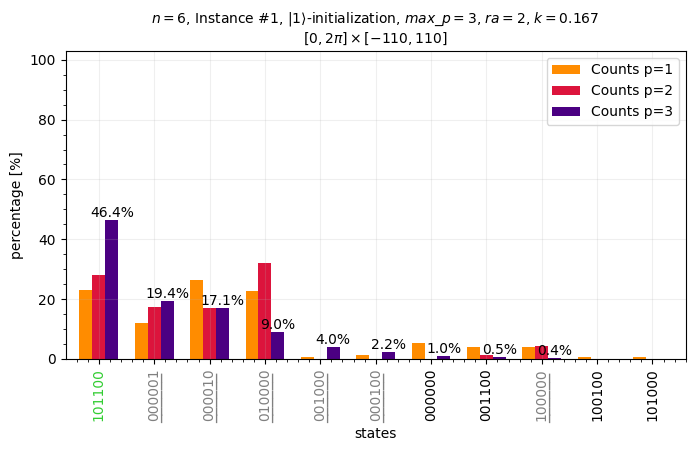

In [23]:
folder_path = "./@2025-01-09@09h13m54s/" # Uncomment this line to plot data from an existing directory
files, datafiles = find_files_containing_string(path=folder_path, verbose=True)

l = len(datafiles)
if l > 1:
    # Plot the whole list of files found.
    plot_list_of_files_parameter_fixing(datafiles, files,
                                        dont_show_in_titles=["n", "init", "p", "k"], 
                                        figsize=(10, l+2), N=13, dpi=300, show_title=False)
else:
    plot_file_parameter_fixing(datafiles[0], files[0],
                               show_title=True,
                               figsize=(8, 4), N=10, dpi=100
                               )